In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from pandas_profiling import ProfileReport

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import LabelEncoder
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [3]:
train = pd.read_csv('Dataset/train.csv')
test = pd.read_csv('Dataset/test.csv')

In [4]:
test["Survived"] = np.nan
submissionIds = pd.DataFrame(test["PassengerId"])

ntrain = train.shape[0]
ntest = test.shape[0]

all_data = pd.concat((train,test)).reset_index(drop=True)

print("all_data siaze is:{}".format(all_data.shape))

all_data siaze is:(1309, 12)


In [5]:
#profile = ProfileReport(all_data, title="Titanic Data", explorative=True)

#profile.to_file("Titanic_Data_Profile.html")

In [6]:
all_data.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [7]:
all_data.drop(['PassengerId'], axis=1, inplace=True)

In [8]:
all_data.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307
unique,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3
top,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914
mean,0.383838,2.294882,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN
std,0.486592,0.837836,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN


In [9]:
all_data.drop(['Ticket'], axis=1, inplace=True)

all_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [10]:
#pd.options.display.float_format = "{:,.2f}".format

#all_data.head()

In [11]:
all_data["Title"] = all_data.Name.str.extract(' ([A-Za-z]+)\.', expand = False)

all_data['Title'] = all_data['Title'].replace(['Sir', 'Countess', 'Lady', 'Col', 'Major', 'Dr', 'Jonkheer', 'Don', 
                                               'Dona', 'Rev', 'Capt'], 'Rare')
all_data['Title'] = all_data['Title'].replace(['Mlle', 'Ms'], 'Miss')
all_data['Title'] = all_data['Title'].replace('Mme', 'Mrs')

all_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Rare,0.347826
2,Mr,0.156673


In [12]:
all_data.drop(['Name'], axis=1, inplace=True)

In [13]:
all_data["Cabin"] = all_data.Cabin.str.extract('(^([A-Z]))', expand = False)

all_data.Cabin[all_data.Cabin.isnull() == True] = 'Unk'

all_data[['Cabin', 'Survived']].groupby(['Cabin'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Cabin,Survived
3,D,0.757576
4,E,0.750000
1,B,0.744681
5,F,0.615385
2,C,0.593220
6,G,0.500000
0,A,0.466667
8,Unk,0.299854
7,T,0.000000


In [14]:
all_data = MultiColumnLabelEncoder(columns=['Cabin']).fit_transform(all_data)

all_data[['Cabin', 'Survived']].groupby(['Cabin'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Cabin,Survived
3,3,0.757576
4,4,0.750000
1,1,0.744681
5,5,0.615385
2,2,0.593220
6,6,0.500000
0,0,0.466667
8,8,0.299854
7,7,0.000000


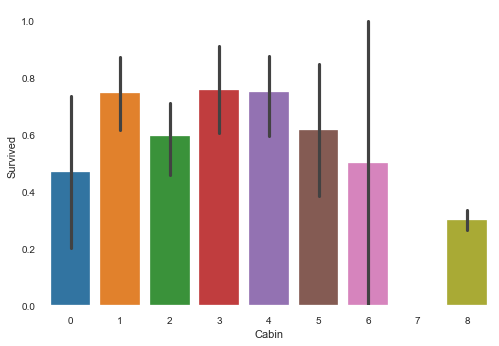

In [15]:
sns.barplot(all_data['Cabin'], all_data['Survived']);

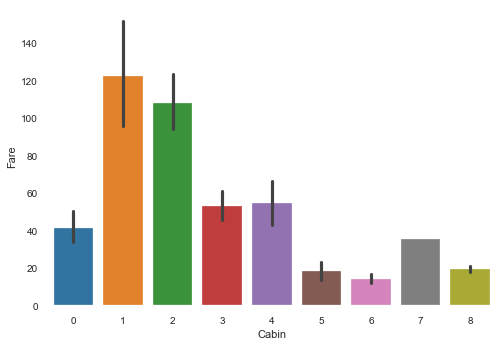

In [16]:
sns.barplot(all_data['Cabin'], all_data['Fare']);

In [17]:
all_data['Fare'].fillna(all_data['Fare'].dropna().median(), inplace=True)

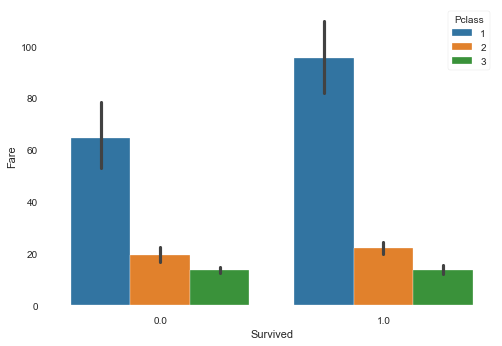

In [18]:
sns.barplot(all_data['Survived'], all_data['Fare'], all_data['Pclass']);

In [19]:
#all_data.drop(['Embarked'], axis=1, inplace=True)
all_data.Embarked[all_data.Embarked.isnull() == True] = 'S'

In [20]:
all_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


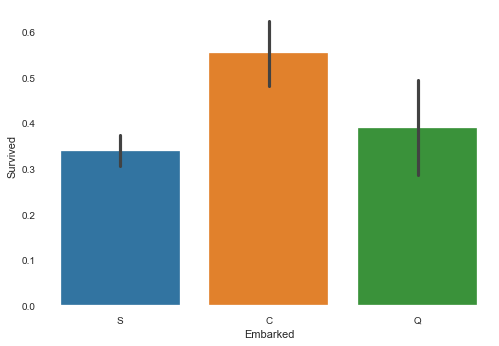

In [21]:
sns.barplot(all_data['Embarked'], all_data['Survived']);

&lt;matplotlib.legend.Legend at 0x7feba0f3c730&gt;

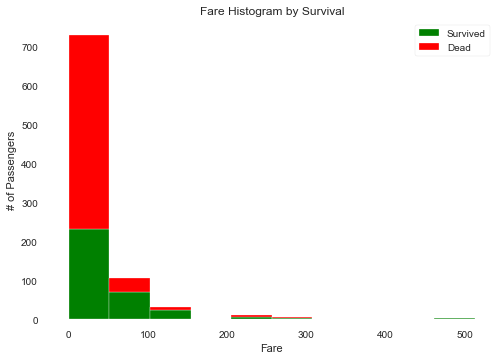

In [22]:
plt.hist(x = [all_data[all_data['Survived']==1]['Fare'],
        all_data[all_data['Survived']==0]['Fare']],
        stacked=True, color=['g','r'], label=['Survived','Dead'])
plt.title('Fare Histogram by Survival')
plt.xlabel('Fare')
plt.ylabel('# of Passengers')
plt.legend()

In [23]:
all_data['FareBand'] = pd.cut(all_data['Fare'],30)
all_data = MultiColumnLabelEncoder(columns=['FareBand']).fit_transform(all_data)
all_data[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,0,0.266129
1,1,0.455497
2,2,0.311111
3,3,0.688889
4,4,0.562500
5,5,0.923077
6,6,0.636364
7,7,0.909091
8,8,0.666667
9,9,1.000000


In [24]:
all_data.drop(['Fare'], axis=1, inplace=True)

In [25]:
all_data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Sex', ascending=False)

,Sex,Survived
1,male,0.188908
0,female,0.742038


In [26]:
#from scipy import stats
#from scipy.stats import norm

#histogram and normal probability plot
#sns.distplot(all_data['Fare'], fit=norm);
#fig = plt.figure()
#res = stats.probplot(all_data['Fare'], plot=plt)

In [27]:
#applying log transformation
#all_data['Fare'] = np.log1p(all_data['Fare'])

#histogram and normal probability plot
#sns.distplot(all_data['Fare'], fit=norm);
#fig = plt.figure()
#res = stats.probplot(all_data['Fare'], plot=plt)

In [28]:
all_data.describe(include='all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked,Title,FareBand
count,891.000000,1309.000000,1309,1046.000000,1309.000000,1309.000000,1309.000000,1309,1309,1309.000000
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,5,NaN
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Mr,NaN
freq,NaN,NaN,843,NaN,NaN,NaN,NaN,916,757,NaN
mean,0.383838,2.294882,NaN,29.881138,0.498854,0.385027,6.729565,NaN,NaN,1.331551
std,0.486592,0.837836,NaN,14.413493,1.041658,0.865560,2.454520,NaN,NaN,2.484833
min,0.000000,1.000000,NaN,0.170000,0.000000,0.000000,0.000000,NaN,NaN,0.000000
25%,0.000000,2.000000,NaN,21.000000,0.000000,0.000000,8.000000,NaN,NaN,0.000000
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,8.000000,NaN,NaN,0.000000
75%,1.000000,3.000000,NaN,39.000000,1.000000,0.000000,8.000000,NaN,NaN,1.000000


In [29]:
all_data = MultiColumnLabelEncoder(columns=['Sex']).fit_transform(all_data)
all_data = pd.get_dummies(all_data, columns = ['Pclass', 'Title', 'Embarked'])

all_data.head()

,Survived,Sex,Age,SibSp,Parch,Cabin,FareBand,Pclass_1,Pclass_2,Pclass_3,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Embarked_C,Embarked_Q,Embarked_S
0,0.0,1,22.0,1,0,8,0,0,0,1,0,0,1,0,0,0,0,1
1,1.0,0,38.0,1,0,2,4,1,0,0,0,0,0,1,0,1,0,0
2,1.0,0,26.0,0,0,8,0,0,0,1,0,1,0,0,0,0,0,1
3,1.0,0,35.0,1,0,2,3,1,0,0,0,0,0,1,0,0,0,1
4,0.0,1,35.0,0,0,8,0,0,0,1,0,0,1,0,0,0,0,1


&lt;matplotlib.legend.Legend at 0x7feba08967f0&gt;

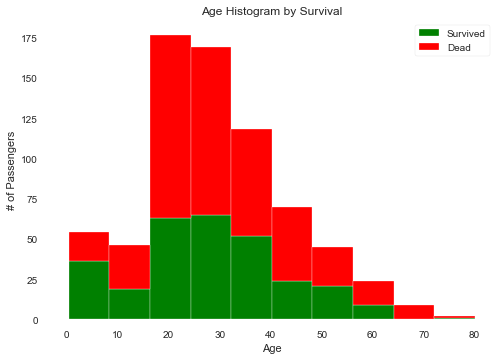

In [30]:
plt.hist(x = [all_data[all_data['Survived']==1]['Age'],
        all_data[all_data['Survived']==0]['Age']],
        stacked=True, color=['g','r'], label=['Survived','Dead'])
plt.title('Age Histogram by Survival')
plt.xlabel('Age')
plt.ylabel('# of Passengers')
plt.legend()

&lt;matplotlib.axes._subplots.AxesSubplot at 0x7feba4e5dfd0&gt;

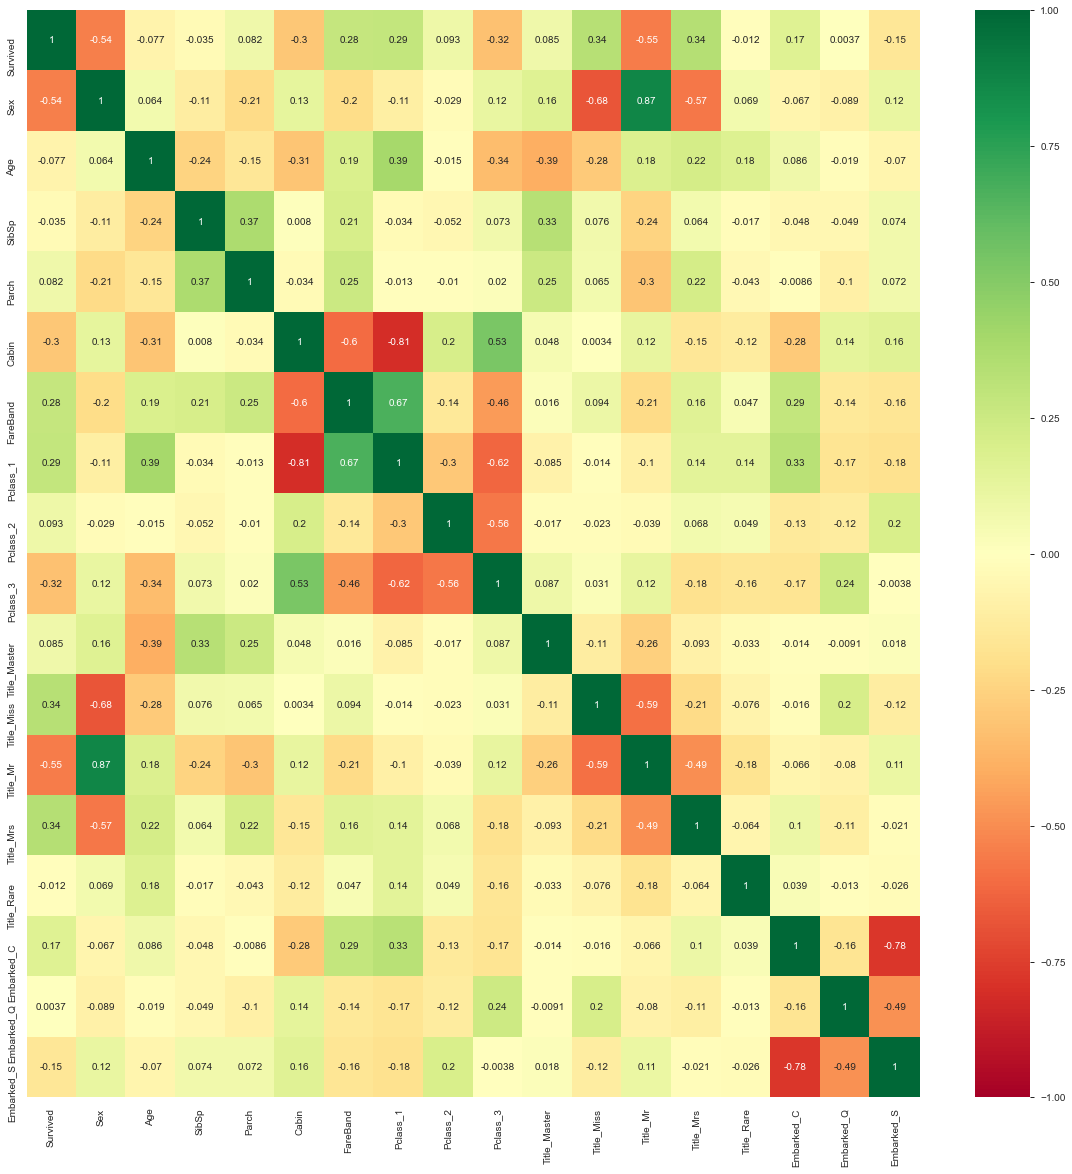

In [31]:
corr_matrix = all_data.corr()

plt.figure (figsize=(20,20))
sns.heatmap(corr_matrix, cmap='RdYlGn', vmin=-1, annot=True)

In [32]:
all_data_age = all_data.copy()

all_data_WithAge = all_data_age[pd.isnull(all_data_age['Age']) == False]
all_data_WithoutAge = all_data_age[pd.isnull(all_data_age['Age'])]

In [33]:
from sklearn.ensemble import RandomForestRegressor

use_Arguments = ['Pclass_1', 'Pclass_3','SibSp', 'Parch','Cabin','FareBand', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Embarked_S',]

rfModel_age = RandomForestRegressor(random_state=42)

rfModel_age.fit (all_data_WithAge[use_Arguments], all_data_WithAge['Age'])

age_Values = rfModel_age.predict(X = all_data_WithoutAge[use_Arguments])

print(age_Values)

[28.88090615 32.04288593 33.88383333 28.88090615 22.32767646 28.25146151
 34.27266667 22.32767646 28.88090615 28.88090615 28.25146151 23.84589322
 22.32767646 21.10084127 49.86488095 31.16856061  6.36974583 28.25146151
 28.25146151 22.32767646 28.25146151 28.25146151 28.25146151 28.25146151
 15.61691521 28.25146151 28.88090615  4.30278532 30.72080519 28.25146151
 28.25146151 11.748      45.34090476 45.75191153  3.98007143 19.177
 38.72676671 33.23314286 19.82854076 28.88090615 22.32767646 16.92928571
 23.84589322 28.25146151  5.43959524 23.32434682 15.74060568 15.74060568
 28.25146151 53.1255     28.88090615 22.32767646 45.75191153 22.32767646
 32.04288593 58.06171429 31.16856061 43.80884307 22.32767646 21.10084127
 25.66685256 28.25146151 30.02766667 16.92928571 15.41522354 41.12402381
 28.25146151 33.04578488 49.86488095 28.88090615 22.32767646 22.32767646
 23.84589322 33.88383333 22.32767646 47.9875     28.25146151 28.88090615
  5.43959524 28.25146151 28.88090615 32.04288593 43.8997

In [34]:
all_data_WithoutAge['Age'] = age_Values.astype(float)

all_data.update(all_data_WithoutAge['Age'])

all_data.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    float64
 1   Sex           1309 non-null   int64  
 2   Age           1309 non-null   float64
 3   SibSp         1309 non-null   int64  
 4   Parch         1309 non-null   int64  
 5   Cabin         1309 non-null   int64  
 6   FareBand      1309 non-null   int64  
 7   Pclass_1      1309 non-null   uint8  
 8   Pclass_2      1309 non-null   uint8  
 9   Pclass_3      1309 non-null   uint8  
 10  Title_Master  1309 non-null   uint8  
 11  Title_Miss    1309 non-null   uint8  
 12  Title_Mr      1309 non-null   uint8  
 13  Title_Mrs     1309 non-null   uint8  
 14  Title_Rare    1309 non-null   uint8  
 15  Embarked_C    1309 non-null   uint8  
 16  Embarked_Q    1309 non-null   uint8  
 17  Embarked_S    1309 non-null   uint8  
dtypes: float64(2),

In [35]:
all_data.describe()

,Survived,Sex,Age,SibSp,Parch,Cabin,FareBand,Pclass_1,Pclass_2,Pclass_3,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,0.383838,0.644003,29.530035,0.498854,0.385027,6.729565,1.331551,0.246753,0.211612,0.541635,0.046600,0.201681,0.578304,0.151261,0.022154,0.206264,0.093965,0.699771
std,0.486592,0.478997,13.544212,1.041658,0.865560,2.454520,2.484833,0.431287,0.408607,0.498454,0.210862,0.401408,0.494019,0.358440,0.147242,0.404777,0.291891,0.458533
min,0.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,22.000000,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,28.251462,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,36.000000,1.000000,0.000000,8.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,80.000000,8.000000,9.000000,8.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


&lt;matplotlib.legend.Legend at 0x7feb9c310580&gt;

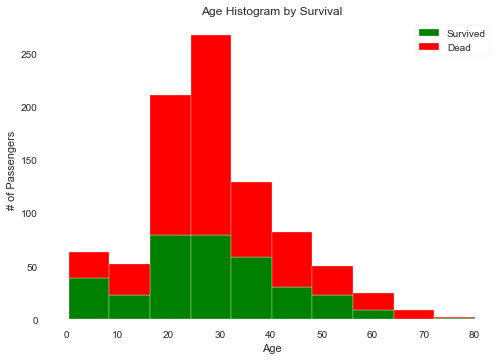

In [36]:
plt.hist(x = [all_data[all_data['Survived']==1]['Age'],
        all_data[all_data['Survived']==0]['Age']],
        stacked=True, color=['g','r'], label=['Survived','Dead'])
plt.title('Age Histogram by Survival')
plt.xlabel('Age')
plt.ylabel('# of Passengers')
plt.legend()

In [37]:
all_data['AgeBand'] = pd.cut(all_data['Age'], 8)

all_data[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.0902, 10.149]",0.561644
1,"(10.149, 20.128]",0.379845
2,"(20.128, 30.106]",0.319648
3,"(30.106, 40.085]",0.444444
4,"(40.085, 50.064]",0.400000
5,"(50.064, 60.043]",0.391304
6,"(60.043, 70.021]",0.235294
7,"(70.021, 80.0]",0.200000


In [38]:
all_data['IsChild'] = np.where(all_data['Age'] < 18, 1, 0)

all_data[['IsChild', 'Survived']].groupby(['IsChild'], as_index=False).mean().sort_values(by='IsChild', ascending=True)

,IsChild,Survived
0,0,0.360526
1,1,0.519084


In [39]:
all_data['IsElderly'] = np.where(all_data['Age'] >= 60, 1, 0)

all_data[['IsElderly', 'Survived']].groupby(['IsElderly'], as_index=False).mean().sort_values(by='IsElderly', ascending=True)

,IsElderly,Survived
0,0,0.387283
1,1,0.269231


In [40]:
all_data = MultiColumnLabelEncoder(columns=['AgeBand']).fit_transform(all_data)
all_data.drop(['Age'], axis=1, inplace=True)

all_data.head()


,Survived,Sex,SibSp,Parch,Cabin,FareBand,Pclass_1,Pclass_2,Pclass_3,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Embarked_C,Embarked_Q,Embarked_S,AgeBand,IsChild,IsElderly
0,0.0,1,1,0,8,0,0,0,1,0,0,1,0,0,0,0,1,2,0,0
1,1.0,0,1,0,2,4,1,0,0,0,0,0,1,0,1,0,0,3,0,0
2,1.0,0,0,0,8,0,0,0,1,0,1,0,0,0,0,0,1,2,0,0
3,1.0,0,1,0,2,3,1,0,0,0,0,0,1,0,0,0,1,3,0,0
4,0.0,1,0,0,8,0,0,0,1,0,0,1,0,0,0,0,1,3,0,0


In [41]:
all_data["FamilySize"] = all_data["SibSp"] + all_data["Parch"]+1
all_data.drop(['SibSp', 'Parch'], axis=1, inplace=True)

&lt;matplotlib.legend.Legend at 0x7feba5be9880&gt;

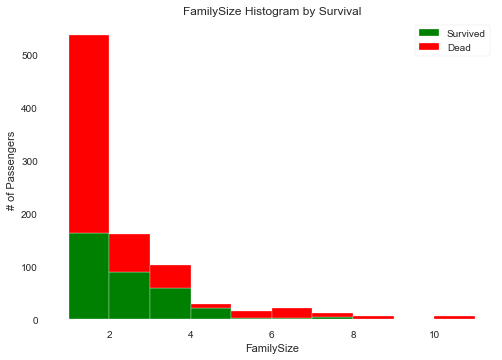

In [42]:
plt.hist(x = [all_data[all_data['Survived']==1]['FamilySize'],
        all_data[all_data['Survived']==0]['FamilySize']],
        stacked=True, color=['g','r'], label=['Survived','Dead'])
plt.title('FamilySize Histogram by Survival')
plt.xlabel('FamilySize')
plt.ylabel('# of Passengers')
plt.legend()

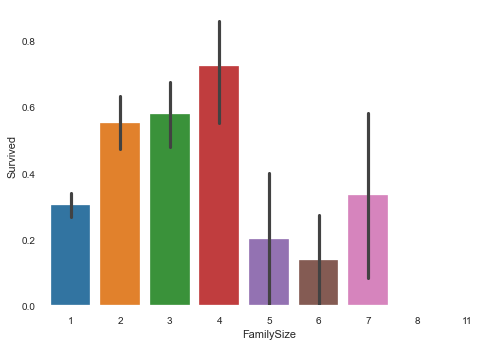

In [43]:
sns.barplot(all_data['FamilySize'], all_data['Survived']);

In [44]:
all_data['IsAlone'] = np.where(all_data['FamilySize'] == 1, 1, 0)

all_data['SmallFamily']   = all_data['FamilySize'].map(lambda s: 1 if 2 <= s <= 4 else 0)

all_data['LargeFamily'] = np.where(all_data['FamilySize'] > 4, 1, 0)


In [45]:
all_data['FamilyBand'] = pd.cut(all_data['FamilySize'], 11)

all_data[['FamilyBand', 'Survived']].groupby(['FamilyBand'], as_index=False).mean().sort_values(by='FamilyBand', ascending=True)

,FamilyBand,Survived
0,"(0.99, 1.909]",0.303538
1,"(1.909, 2.818]",0.552795
2,"(2.818, 3.727]",0.578431
3,"(3.727, 4.636]",0.724138
4,"(4.636, 5.545]",0.200000
5,"(5.545, 6.455]",0.136364
6,"(6.455, 7.364]",0.333333
7,"(7.364, 8.273]",0.000000
8,"(8.273, 9.182]",NaN
9,"(9.182, 10.091]",NaN


In [46]:
all_data = MultiColumnLabelEncoder(columns=['FamilyBand']).fit_transform(all_data)

all_data[['FamilyBand', 'Survived']].groupby(['FamilyBand'], as_index=False).mean().sort_values(by='FamilyBand', ascending=True)

,FamilyBand,Survived
0,0,0.303538
1,1,0.552795
2,2,0.578431
3,3,0.724138
4,4,0.200000
5,5,0.136364
6,6,0.333333
7,7,0.000000
8,8,0.000000


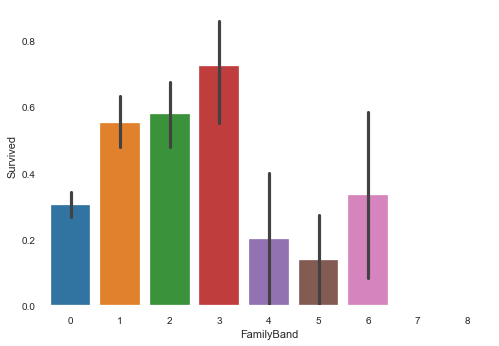

In [47]:
sns.barplot(all_data['FamilyBand'], all_data['Survived']);

In [48]:
#all_data = pd.get_dummies(all_data, columns = ['FamilyBand'])

In [49]:
all_data.drop(['FamilySize'], axis=1, inplace=True)

all_data.head()

,Survived,Sex,Cabin,FareBand,Pclass_1,Pclass_2,Pclass_3,Title_Master,Title_Miss,Title_Mr,...,Embarked_C,Embarked_Q,Embarked_S,AgeBand,IsChild,IsElderly,IsAlone,SmallFamily,LargeFamily,FamilyBand
0,0.0,1,8,0,0,0,1,0,0,1,...,0,0,1,2,0,0,0,1,0,1
1,1.0,0,2,4,1,0,0,0,0,0,...,1,0,0,3,0,0,0,1,0,1
2,1.0,0,8,0,0,0,1,0,1,0,...,0,0,1,2,0,0,1,0,0,0
3,1.0,0,2,3,1,0,0,0,0,0,...,0,0,1,3,0,0,0,1,0,1
4,0.0,1,8,0,0,0,1,0,0,1,...,0,0,1,3,0,0,1,0,0,0


In [50]:
all_data.describe()

,Survived,Sex,Cabin,FareBand,Pclass_1,Pclass_2,Pclass_3,Title_Master,Title_Miss,Title_Mr,...,Embarked_C,Embarked_Q,Embarked_S,AgeBand,IsChild,IsElderly,IsAlone,SmallFamily,LargeFamily,FamilyBand
count,891.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,...,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,0.383838,0.644003,6.729565,1.331551,0.246753,0.211612,0.541635,0.046600,0.201681,0.578304,...,0.206264,0.093965,0.699771,2.394194,0.135982,0.030558,0.603514,0.333843,0.062643,0.867074
std,0.486592,0.478997,2.454520,2.484833,0.431287,0.408607,0.498454,0.210862,0.401408,0.494019,...,0.404777,0.291891,0.458533,1.363178,0.342900,0.172182,0.489354,0.471765,0.242413,1.494861
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,8.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,8.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


In [51]:
#all_data['Pclass*Fare'] = all_data['Pclass'] * all_data['FareBand']
#all_data['Pclass*Age'] = all_data['Pclass'] * all_data['AgeBand']
#all_data['Title*Fare'] = all_data['Title'] * all_data['FareBand']
#all_data['Title*Age'] = all_data['Title'] * all_data['AgeBand']
#all_data['Title*Class'] = all_data['Title'] * all_data['Pclass']
#all_data['Embarked*Fare'] = all_data['Embarked'] * all_data['FareBand']
#all_data['Embarked*Class'] = all_data['Embarked'] * all_data['Pclass']
#all_data['Embarked*Age'] = all_data['Embarked'] * all_data['AgeBand']
#all_data['Embarked*Title'] = all_data['Embarked'] * all_data['Title']

#all_data = pd.get_dummies(all_data, columns = ['Title', 'Embarked', 'Pclass'])

&lt;matplotlib.axes._subplots.AxesSubplot at 0x7feba4e38370&gt;

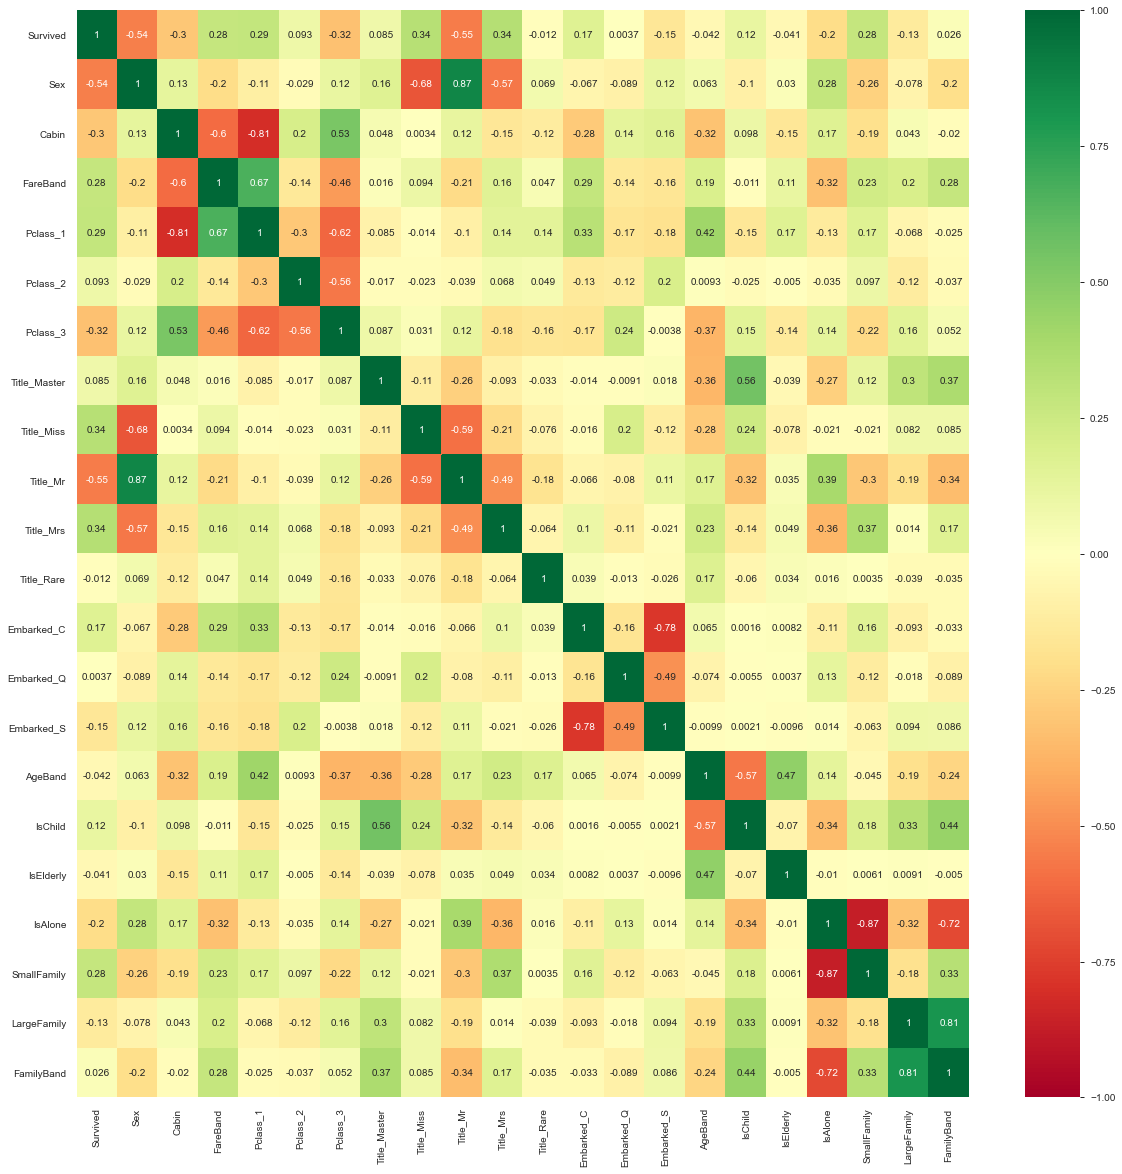

In [52]:
corr_matrix = all_data.corr()

plt.figure (figsize=(20,20))
sns.heatmap(corr_matrix, cmap='RdYlGn', vmin=-1, annot=True)

In [53]:
all_data.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    float64
 1   Sex           1309 non-null   int64  
 2   Cabin         1309 non-null   int64  
 3   FareBand      1309 non-null   int64  
 4   Pclass_1      1309 non-null   uint8  
 5   Pclass_2      1309 non-null   uint8  
 6   Pclass_3      1309 non-null   uint8  
 7   Title_Master  1309 non-null   uint8  
 8   Title_Miss    1309 non-null   uint8  
 9   Title_Mr      1309 non-null   uint8  
 10  Title_Mrs     1309 non-null   uint8  
 11  Title_Rare    1309 non-null   uint8  
 12  Embarked_C    1309 non-null   uint8  
 13  Embarked_Q    1309 non-null   uint8  
 14  Embarked_S    1309 non-null   uint8  
 15  AgeBand       1309 non-null   int64  
 16  IsChild       1309 non-null   int64  
 17  IsElderly     1309 non-null   int64  
 18  IsAlone       

In [54]:
train = all_data[:ntrain]
test = all_data[ntrain:]

test.drop(['Survived'], axis=1, inplace=True)

In [55]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.metrics import accuracy_score

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#Scale data
#scaler = StandardScaler().fit(test)
scaler = MinMaxScaler().fit(test)
scaled_test = scaler.transform(test)

imputed_test = pd.DataFrame(scaled_test)
imputed_test.columns = test.columns


#Scale data
#scaler = StandardScaler().fit(train)
scaler = MinMaxScaler().fit(train)
scaled_train = scaler.transform(train)

imputed_train = pd.DataFrame(scaled_train)
imputed_train.columns = train.columns

y = train.Survived

imputed_train.drop(['Survived'], axis=1, inplace=True)

X = imputed_train

In [57]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 10 best features

           Specs       Score
8       Title_Mr  112.805785
0            Sex   92.702447
9      Title_Mrs   89.474177
7     Title_Miss   79.531749
3       Pclass_1   55.175151
18   SmallFamily   46.912822
5       Pclass_3   41.553071
2       FareBand   21.276475
11    Embarked_C   20.464401
17       IsAlone   14.640793
19   LargeFamily   12.983634
15       IsChild   10.131516
1          Cabin    9.094624
6   Title_Master    6.180425
4       Pclass_2    6.160767
13    Embarked_S    5.489205
16     IsElderly    1.443967
20    FamilyBand    0.192859
14       AgeBand    0.177811
10    Title_Rare    0.126121


In [58]:
#use_features = ['Title_2', 'Sex', 'Title_3', 'Title_1', 'SmallFamily', 'Pclass_3', 'FareBand', 'Embarked_0',
#                'Embarked*Class', 'Title*Fare', 'IsAlone', 'LargeFamily', 'Pclass*Fare', 'Title*Class']

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=42, test_size = 0.3)

&lt;matplotlib.axes._subplots.AxesSubplot at 0x7feb894ab6a0&gt;

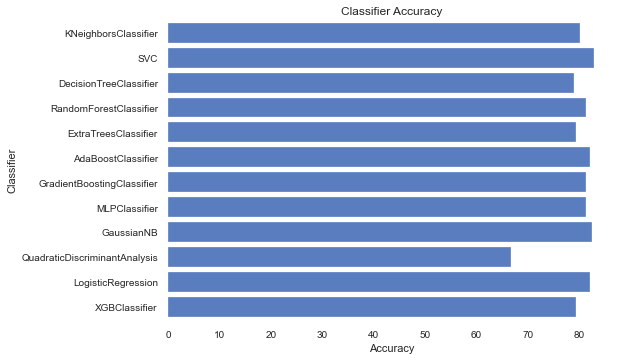

In [59]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from xgboost import XGBClassifier

classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True, gamma='auto'),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    ExtraTreesClassifier(n_estimators=100, random_state=42),
    #SGDClassifier(random_state=42),
    AdaBoostClassifier(n_estimators=100, random_state=42),
    GradientBoostingClassifier(random_state=42),
    MLPClassifier(max_iter = 1000, random_state= 42),
    GaussianNB(),
    #LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression(random_state=42),
    #NearestCentroid(),
    XGBClassifier(objective="binary:logistic", random_state=42)]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

acc_dict = {}


for clf in classifiers:
    name = clf.__class__.__name__
    clf.fit(train_X, train_y)
    train_predictions = clf.predict(val_X)
    acc = accuracy_score(val_y, train_predictions)
    if name in acc_dict:
        acc_dict[name] += acc
    else:
        acc_dict[name] = acc

for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] * 100.0
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

In [60]:
log.groupby(['Classifier'], as_index=False).mean().sort_values(by='Accuracy', ascending=False)

,Classifier,Accuracy
10,SVC,82.835821
3,GaussianNB,82.462687
0,AdaBoostClassifier,82.089552
6,LogisticRegression,82.089552
4,GradientBoostingClassifier,81.343284
7,MLPClassifier,81.343284
9,RandomForestClassifier,81.343284
5,KNeighborsClassifier,80.223881
2,ExtraTreesClassifier,79.477612
11,XGBClassifier,79.477612


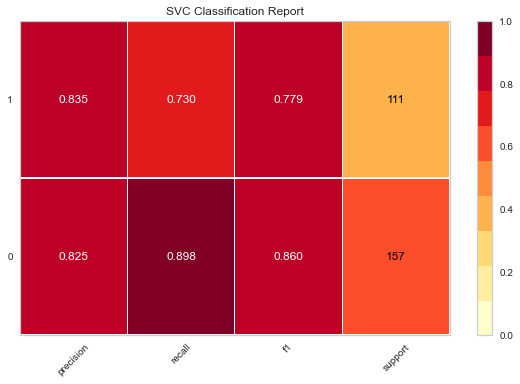

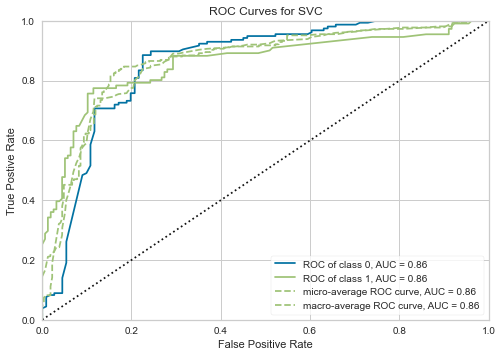

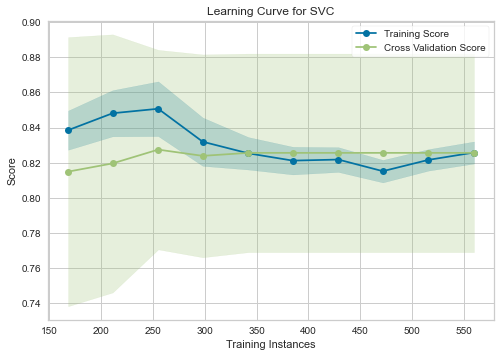

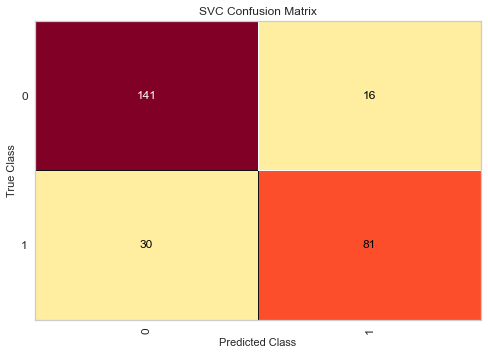

&lt;Figure size 576x396 with 0 Axes&gt;

In [61]:
from sklearn.model_selection import StratifiedKFold

from yellowbrick.classifier import ClassificationReport
from yellowbrick.model_selection import LearningCurve
from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.classifier import confusion_matrix

classes = ["0", "1"]

# Instantiate the classification model and visualizer
model = SVC(probability=True, gamma='auto')

visualizer = ClassificationReport(model, classes=classes, support=True)

visualizer.fit(train_X, train_y)        # Fit the visualizer and the model
visualizer.score(val_X, val_y)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

#ROCAUC
#roc_auc(model, train_X, train_y, X_test=val_X, y_test=val_y, classes=classes)
roc_auc(model, train_X, train_y, val_X, val_y, classes=classes)

# Create the learning curve visualizer
cv = StratifiedKFold(n_splits=10)
sizes = np.linspace(0.3, 1.0, 10)

# Instantiate visualizer
visualizer = LearningCurve(
    model, cv=cv, scoring='f1_weighted', train_sizes=sizes, n_jobs=4
)

visualizer.fit(train_X, train_y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

# Instantiate confusion matrix
confusion_matrix(
    model,
    train_X, train_y, val_X, val_y,
    classes=classes
)
plt.tight_layout()

In [62]:
pred = visualizer.predict(val_X)
print(classification_report(pred, val_y))

              precision    recall  f1-score   support

         0.0       0.90      0.82      0.86       171
         1.0       0.73      0.84      0.78        97

    accuracy                           0.83       268
   macro avg       0.81      0.83      0.82       268
weighted avg       0.84      0.83      0.83       268



In [63]:
#from yellowbrick.model_selection import RFECV

# Instantiate RFECV visualizer
#visualizer = RFECV(model)

#visualizer.fit(train_X, train_y)        # Fit the data to the visualizer
#visualizer.show()           # Finalize and render the figure

In [64]:
#final_model=visualizer.rfe_estimator_
final_model=model

In [65]:
# Instantiate visualizer
#visualizer = LearningCurve(
#    final_model, cv=cv, scoring='f1_weighted', train_sizes=sizes, n_jobs=4
#)

#visualizer.fit(train_X, train_y)        # Fit the data to the visualizer
#visualizer.show()           # Finalize and render the figure

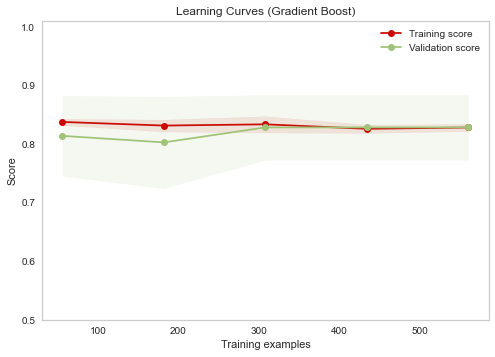

In [66]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score, cross_val_predict, learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curves
title = "Learning Curves (Gradient Boost)"
cv = 10
plot_learning_curve(final_model, title, train_X, train_y, ylim=(0.5, 1.01), cv=cv, n_jobs=1);


In [67]:
pred = final_model.predict(val_X)
print(classification_report(pred, val_y))

              precision    recall  f1-score   support

         0.0       0.90      0.82      0.86       171
         1.0       0.73      0.84      0.78        97

    accuracy                           0.83       268
   macro avg       0.81      0.83      0.82       268
weighted avg       0.84      0.83      0.83       268



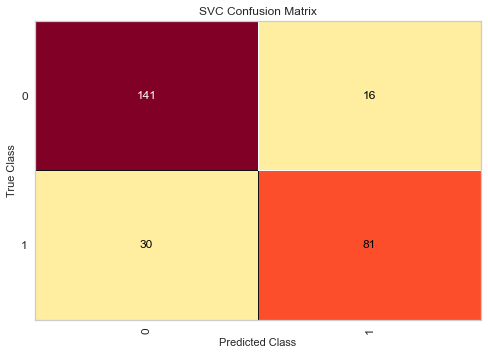

&lt;Figure size 576x396 with 0 Axes&gt;

In [68]:
# Instantiate confusion matrix
confusion_matrix(
    final_model,
    train_X, train_y, val_X, val_y,
    classes=classes
)
plt.tight_layout()

In [69]:
submissionIds.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [70]:
pred = final_model.predict(imputed_test)

submission = pd.DataFrame({'PassengerId':submissionIds['PassengerId'], 'Survived':pred})

submission['PassengerId'] = submission['PassengerId'].astype('int')
submission['Survived'] = submission['Survived'].astype('int')

filename = 'Titanic Prediction.csv'

submission.to_csv(filename, index=False)

In [71]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(final_model, random_state=42).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

Weight,Feature
0.0373 ± 0.0177,Title_Mr
0.0261 ± 0.0094,LargeFamily
0.0060 ± 0.0130,Sex
0 ± 0.0000,IsChild
0 ± 0.0000,AgeBand
0 ± 0.0000,Embarked_S
0 ± 0.0000,Embarked_Q
0 ± 0.0000,Embarked_C
0 ± 0.0000,Cabin
0 ± 0.0000,Pclass_3


In [72]:
import shap

# load JS visualization code to notebook
#shap.initjs()

# explain the model's predictions using SHAP

#explainer = shap.TreeExplainer(model)
#shap_values = explainer.shap_values(val_X)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
#shap.force_plot(explainer.expected_value, shap_values[4,:], val_X.iloc[4,:])

In [73]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()

In [74]:
model.add(Dense(16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 21))
model.add(Dropout(0.50))
model.add(Dense(32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.50))
model.add(Dense(8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.50))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [75]:
model.summary()

Model: &quot;sequential&quot;
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                352       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 264       
_________________________________________________________________
dropout_2 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)        

In [76]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_X, train_y, batch_size=32, epochs=300)

932us/step - loss: 0.4332 - accuracy: 0.8347
Epoch 107/300
20/20 [==============================] - 0s 934us/step - loss: 0.4454 - accuracy: 0.8411
Epoch 108/300
20/20 [==============================] - 0s 799us/step - loss: 0.4170 - accuracy: 0.8347
Epoch 109/300
20/20 [==============================] - 0s 883us/step - loss: 0.4307 - accuracy: 0.8315
Epoch 110/300
20/20 [==============================] - 0s 829us/step - loss: 0.4563 - accuracy: 0.8411
Epoch 111/300
20/20 [==============================] - 0s 1ms/step - loss: 0.4433 - accuracy: 0.8379
Epoch 112/300
20/20 [==============================] - 0s 872us/step - loss: 0.4182 - accuracy: 0.8443
Epoch 113/300
20/20 [==============================] - 0s 865us/step - loss: 0.4540 - accuracy: 0.8250
Epoch 114/300
20/20 [==============================] - 0s 831us/step - loss: 0.4203 - accuracy: 0.8250
Epoch 115/300
20/20 [==============================] - 0s 918us/step - loss: 0.4323 - accuracy: 0.8395
Epoch 116/300
20/20 [=========

&lt;tensorflow.python.keras.callbacks.History at 0x7feb92715910&gt;

In [77]:
pred = model.predict_classes(val_X)
print(metrics.accuracy_score(val_y, pred))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) &gt; 0.5).astype(&quot;int32&quot;)`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
0.8134328358208955


In [78]:
print(classification_report(pred, val_y))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85       173
           1       0.70      0.82      0.76        95

    accuracy                           0.81       268
   macro avg       0.80      0.82      0.80       268
weighted avg       0.82      0.81      0.82       268



In [79]:
history=model.fit(train_X, train_y, validation_split=0.25, epochs=300, batch_size=32, verbose=0)

print(history.history.keys())

dict_keys([&#39;loss&#39;, &#39;accuracy&#39;, &#39;val_loss&#39;, &#39;val_accuracy&#39;])


&lt;function matplotlib.pyplot.show(*args, **kw)&gt;

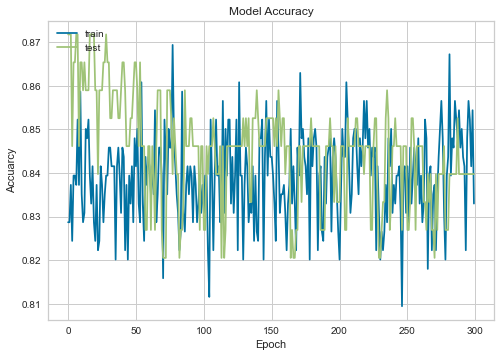

In [80]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuarcy')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc='upper left')
plt.show

&lt;function matplotlib.pyplot.show(*args, **kw)&gt;

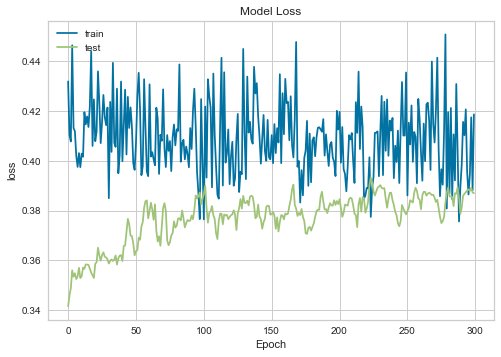

In [81]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc='upper left')
plt.show

In [82]:
pred = model.predict_classes(imputed_test)

submission['PassengerId'] = submissionIds['PassengerId'].astype('int')
submission['Survived'] = pred.astype('int')

filename = 'Titanic Prediction TF.csv'

submission.to_csv(filename, index=False)